In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv("ENB2012_data.csv", encoding = 'latin-1')

In [13]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}


In [14]:
df = df.rename(columns=column_names)
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

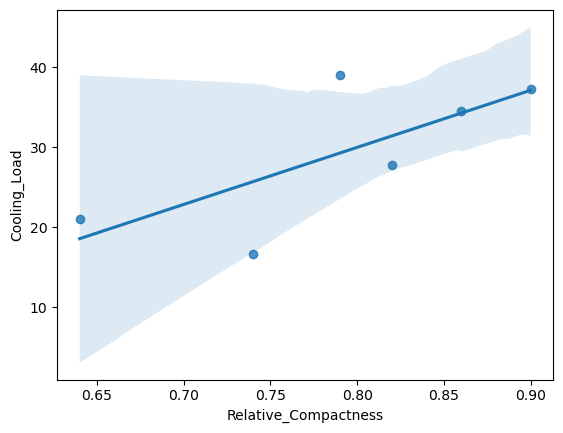

In [21]:
#regression plot
sns.regplot(x = "Relative_Compactness", y = "Cooling_Load", data=simple_linear_reg_df)         


In [22]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


In [29]:
#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.from sklearn.model_selection
from sklearn.model_selection 
import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)
linear_model = LinearRegression()

SyntaxError: invalid syntax (2115349323.py, line 3)

In [ ]:
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

In [ ]:
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #prints 0.063

In [ ]:
## Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) #prints 1.823

In [ ]:
## Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) #prints 0.089

In [ ]:
R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) #prints 0.893

In [ ]:
# Penalization Methods


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

In [ ]:
# Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

In [19]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):

#this function returns the weight of every feature
weights = pd.Series(model.coef_, feat.columns).sort_values()
weights_df = pd.DataFrame(weights).reset_index()
weights_df.columns = ['Features', col_name]
weights_df[col_name].round(3)
return weights_df

linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

IndentationError: expected an indented block (1290028471.py, line 5)